# 2022-08-08

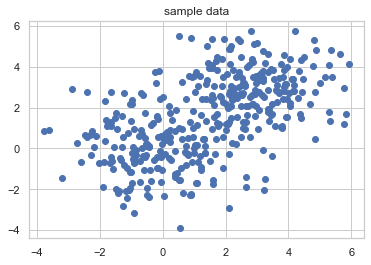

In [20]:
%matplotlib inline 

from sklearn.datasets import make_gaussian_quantiles
import numpy as np 

x1, y1 = make_gaussian_quantiles(cov=2, n_samples=200, n_features=2, n_classes=2, random_state=0)
x2, y2 = make_gaussian_quantiles(mean=(3,3), cov=1.5, n_samples=200, n_features=2, n_classes=2, random_state=0)

plt.title('sample data')
plt.scatter(x1[:,0], x1[:,1]) ; plt.scatter(x2[:,0], x2[:,1], c='b')
plt.show()

In [30]:
X = np.concatenate([x1, x2], axis=0)
y = np.concatenate([y1, y2], axis=0) 

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

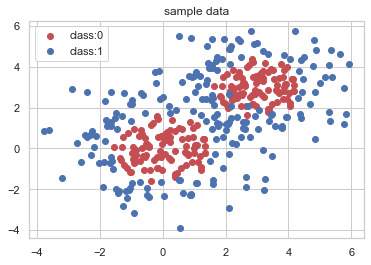

In [34]:
idx0 = np.where(y == 0) 
idx1 = np.where(y == 1)

plt.title('sample data')
plt.scatter(X[idx0,0], X[idx0,1], c='r', label='class:0') ; plt.scatter(X[idx1,0], X[idx1,1], c='b', label='class:1')
plt.legend() 
plt.show()

In [14]:
# 모델 앙상블 구축 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score 

model1 = LogisticRegression(random_state=1)
model2 = GaussianNB()
model3 = QuadraticDiscriminantAnalysis()

# 모델 앙상블
model_ensemble = VotingClassifier(estimators=[('lr', model1), ('gnb', model2), ('qda', model3)], voting='hard')

result1 = accuracy_score(y_test, model1.fit(x_train, y_train).predict(x_test))
result2 = accuracy_score(y_test, model2.fit(x_train, y_train).predict(x_test))
result3 = accuracy_score(y_test, model3.fit(x_train, y_train).predict(x_test))
result4 = accuracy_score(y_test, model_ensemble.fit(x_train, y_train).predict(x_test))

print(f'로지스틱회귀 검증셋 정확도: {result1}') ; print(f'가우시안 나이브베이즈 검증셋 정확도 : {result2}') ; print(f'QDA 모형 검증셋 정확도: {result3}') 
print(f'모델 앙상블 검증셋 정확도: {result4}')

로지스틱회귀 검증셋 정확도: 0.48
가우시안 나이브베이즈 검증셋 정확도 : 0.62
QDA 모형 검증셋 정확도: 0.78
모델 앙상블 검증셋 정확도: 0.69


### 개별 모형들과 모델 앙상블 성능 비교

사용한 성능 측정 지표: 정확도(accuracy score)

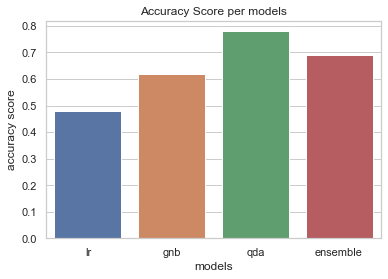

In [15]:
import seaborn as sns 
sns.barplot([1,2,3,4], [result1, result2, result3, result4])
plt.xticks([0,1,2,3], ['lr', 'gnb', 'qda', 'ensemble'])
plt.xlabel('models')
plt.ylabel('accuracy score')
plt.title('Accuracy Score per models')
plt.show() 

In [16]:
# 모델 예측 결과 시각화 - 2
x1min, x1max = X[:,0].min(), X[:,0].max() 
x2min, x2max = X[:,1].min(), X[:,1].max()

# 예측할 샘플 데이터셋 
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.01), np.arange(x2min, x2max, 0.01)) 
X2 = np.c_[xx1.ravel() , xx2.ravel()]

# 개별모델3, 앙상블1 훈련 
model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
ensemble = model_ensemble.fit(x_train, y_train)

# 샘플 데이터셋 X2 예측 
Y1 = model1.predict(X2).reshape(xx1.shape)
Y2 = model2.predict(X2).reshape(xx1.shape)
Y3 = model3.predict(X2).reshape(xx1.shape)
Y4 = ensemble.predict(X2).reshape(xx1.shape)

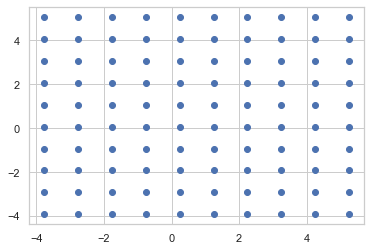

In [10]:
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 1), np.arange(x2min, x2max, 1)) 
plt.scatter(xx1, xx2)

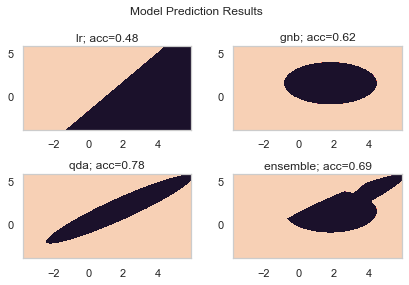

In [33]:
plt.subplot(2,2,1)
plt.contourf(xx1, xx2, Y1)
#plt.scatter(X[idx0,0], X[idx0,1], c='r') ; plt.scatter(X[idx1,0], X[idx1,1], c='b')
plt.title(f'lr; acc={result1}')

plt.subplot(2,2,2)
plt.contourf(xx1, xx2, Y2)
#plt.scatter(X[idx0,0], X[idx0,1], c='r') ; plt.scatter(X[idx1,0], X[idx1,1], c='b')
plt.title(f'gnb; acc={result2}')

plt.subplot(2,2,3)
plt.contourf(xx1, xx2, Y3)
#plt.scatter(X[idx0,0], X[idx0,1], c='r') ; plt.scatter(X[idx1,0], X[idx1,1], c='b')
plt.title(f'qda; acc={result3}')

plt.subplot(2,2,4)
plt.contourf(xx1, xx2, Y4)
#plt.scatter(X[idx0,0], X[idx0,1], c='r') ; plt.scatter(X[idx1,0], X[idx1,1], c='b')
plt.title(f'ensemble; acc={result4}')

plt.suptitle('Model Prediction Results')
plt.tight_layout() 
plt.show() 

In [36]:
# soft voting 방식 - 평균 방식

model1 = LogisticRegression(random_state=1)
model2 = GaussianNB()
model3 = QuadraticDiscriminantAnalysis()

# 모델 앙상블
model_ensemble = VotingClassifier(estimators=[('lr', model1), ('gnb', model2), ('qda', model3)], voting='soft')

result1 = accuracy_score(y_test, model1.fit(x_train, y_train).predict(x_test))
result2 = accuracy_score(y_test, model2.fit(x_train, y_train).predict(x_test))
result3 = accuracy_score(y_test, model3.fit(x_train, y_train).predict(x_test))
result4 = accuracy_score(y_test, model_ensemble.fit(x_train, y_train).predict(x_test))

print(f'로지스틱회귀 검증셋 정확도: {result1}') ; print(f'가우시안 나이브베이즈 검증셋 정확도 : {result2}') ; print(f'QDA 모형 검증셋 정확도: {result3}') 
print(f'모델 앙상블 검증셋 정확도: {result4}')

로지스틱회귀 검증셋 정확도: 0.51
가우시안 나이브베이즈 검증셋 정확도 : 0.59
QDA 모형 검증셋 정확도: 0.76
모델 앙상블 검증셋 정확도: 0.72


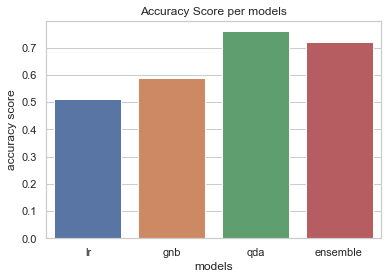

In [37]:
import seaborn as sns 
sns.barplot([1,2,3,4], [result1, result2, result3, result4])
plt.xticks([0,1,2,3], ['lr', 'gnb', 'qda', 'ensemble'])
plt.xlabel('models')
plt.ylabel('accuracy score')
plt.title('Accuracy Score per models')
plt.show() 

In [38]:
# 모델 예측 결과 시각화 - 2
x1min, x1max = X[:,0].min(), X[:,0].max() 
x2min, x2max = X[:,1].min(), X[:,1].max()

# 예측할 샘플 데이터셋 
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.01), np.arange(x2min, x2max, 0.01)) 
X2 = np.c_[xx1.ravel() , xx2.ravel()]

# 개별모델3, 앙상블1 훈련 
model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
ensemble = model_ensemble.fit(x_train, y_train)

# 샘플 데이터셋 X2 예측 
Y1 = model1.predict(X2).reshape(xx1.shape)
Y2 = model2.predict(X2).reshape(xx1.shape)
Y3 = model3.predict(X2).reshape(xx1.shape)
Y4 = ensemble.predict(X2).reshape(xx1.shape)

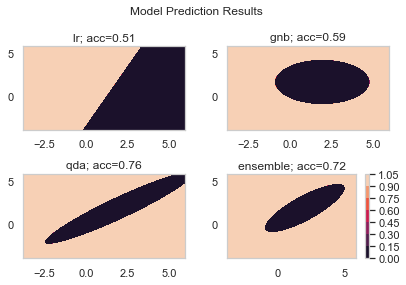

In [40]:
plt.subplot(2,2,1)
plt.contourf(xx1, xx2, Y1)
plt.title(f'lr; acc={result1}')

plt.subplot(2,2,2)
plt.contourf(xx1, xx2, Y2)
plt.title(f'gnb; acc={result2}')

plt.subplot(2,2,3)
plt.contourf(xx1, xx2, Y3)
plt.title(f'qda; acc={result3}')

plt.subplot(2,2,4)
cs = plt.contourf(xx1, xx2, Y4)
plt.colorbar(cs)
plt.title(f'ensemble; acc={result4}')

plt.suptitle('Model Prediction Results')
plt.tight_layout() 
plt.show() 

In [82]:
# soft voting - 가중합 방식 
# soft voting 방식 - 평균 방식

model1 = LogisticRegression(random_state=1)
model2 = GaussianNB()
model3 = QuadraticDiscriminantAnalysis()

# 모델 앙상블
model_ensemble = VotingClassifier(estimators=[('lr', model1), ('gnb', model2), ('qda', model3)], voting='soft', weights=[1,2,1])

result1 = accuracy_score(y_test, model1.fit(x_train, y_train).predict(x_test))
result2 = accuracy_score(y_test, model2.fit(x_train, y_train).predict(x_test))
result3 = accuracy_score(y_test, model3.fit(x_train, y_train).predict(x_test))
result4 = accuracy_score(y_test, model_ensemble.fit(x_train, y_train).predict(x_test))

print(f'로지스틱회귀 검증셋 정확도: {result1}') ; print(f'가우시안 나이브베이즈 검증셋 정확도 : {result2}') ; print(f'QDA 모형 검증셋 정확도: {result3}') 
print(f'모델 앙상블 검증셋 정확도: {result4}')

로지스틱회귀 검증셋 정확도: 0.36
가우시안 나이브베이즈 검증셋 정확도 : 0.63
QDA 모형 검증셋 정확도: 0.82
모델 앙상블 검증셋 정확도: 0.75


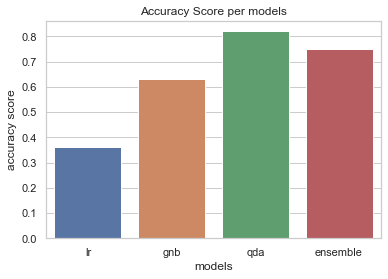

In [83]:
import seaborn as sns 
sns.barplot([1,2,3,4], [result1, result2, result3, result4])
plt.xticks([0,1,2,3], ['lr', 'gnb', 'qda', 'ensemble'])
plt.xlabel('models')
plt.ylabel('accuracy score')
plt.title('Accuracy Score per models')
plt.show() 

In [84]:
# 모델 예측 결과 시각화 - 2
x1min, x1max = X[:,0].min(), X[:,0].max() 
x2min, x2max = X[:,1].min(), X[:,1].max()

# 예측할 샘플 데이터셋 
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.01), np.arange(x2min, x2max, 0.01)) 
X2 = np.c_[xx1.ravel() , xx2.ravel()]

# 개별모델3, 앙상블1 훈련 
model1 = model1.fit(x_train, y_train)
model2 = model2.fit(x_train, y_train)
model3 = model3.fit(x_train, y_train)
ensemble = model_ensemble.fit(x_train, y_train)

# 샘플 데이터셋 X2 예측 
Y1 = model1.predict(X2).reshape(xx1.shape)
Y2 = model2.predict(X2).reshape(xx1.shape)
Y3 = model3.predict(X2).reshape(xx1.shape)
Y4 = ensemble.predict(X2).reshape(xx1.shape)

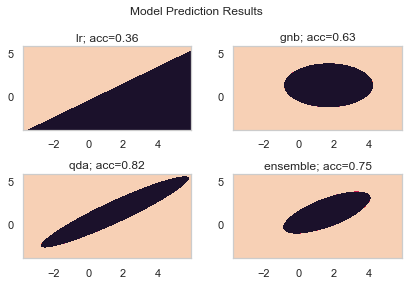

In [85]:
plt.subplot(2,2,1)
plt.contourf(xx1, xx2, Y1)
plt.title(f'lr; acc={result1}')

plt.subplot(2,2,2)
plt.contourf(xx1, xx2, Y2)
plt.title(f'gnb; acc={result2}')

plt.subplot(2,2,3)
plt.contourf(xx1, xx2, Y3)
plt.title(f'qda; acc={result3}')

plt.subplot(2,2,4)
plt.contourf(xx1, xx2, Y4)
plt.title(f'ensemble; acc={result4}')

plt.suptitle('Model Prediction Results')
plt.tight_layout() 
plt.show() 

In [86]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() 
x, y = iris.data[:, [0,2]], iris.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

# 단일 의사결정나무 분류기
model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(x_train, y_train)

# 배깅 모형 분류기; 100개 단일 의사결정나무 모형으로 구성. 
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(x_train, y_train) 

# 단일 의사결정나무 분류기 예측 
print(f'단일 의사결정나무 분류기 예측 정확도: {accuracy_score(model1.predict(x_test), y_test)}')

# 배깅 모형 분류기 예측 
print(f'배깅 모형 분류기 예측 정확도: {accuracy_score(model2.predict(x_test), y_test)}')

단일 의사결정나무 분류기 예측 정확도: 0.8947368421052632
배깅 모형 분류기 예측 정확도: 0.8947368421052632


In [90]:
from sklearn.datasets import make_classification # 분류모델 테스트용; 조건에 맞는 가상데이터 생성
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

x, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_classes=2, random_state=0, shuffle=False) # 모델 테스트용 가상데이터

forest = ExtraTreesClassifier(n_estimators=250, random_state=0) # 의사결정나무 250개로 구성된 랜덤포레스트 
forest.fit(x, y)

importances = forest.feature_importances_ # 각 특성변수의 정보획득량 평균

rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x, y)
rf.feature_importances_ # 일반 랜덤포레스트에 대해서도 정보획득량 평균 구할 수 있다. 

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)



In [100]:
importances[1]

0.29590176184951045

In [99]:
li = [tree.feature_importances_ for tree in forest.estimators_]
np.mean([x[1] for x in li])

0.2959017618495103

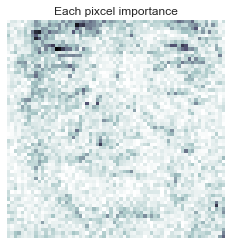

In [102]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
x = data.data ; y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

r_forest = RandomForestClassifier(random_state=2, n_estimators=250).fit(x_train, y_train)

# 각 픽셀 별 정보획득량 평균(픽셀 별 중요도)
fi = r_forest.feature_importances_

fi_2 = fi.reshape(data.images[0].shape)

plt.imshow(fi_2, cmap=plt.cm.bone_r)
plt.axis('off')
plt.title('Each pixcel importance')
plt.show()

In [118]:
x

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)